In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator as op
from functools import reduce

In [2]:
def pos(coff,t):
    return coff[0] + coff[1]*t + coff[2]*t**2 + coff[3]*t**3 + coff[4]*t**4

def vel(coff,t):
    return coff[1] + 2*coff[2]*t + 3*coff[3]*t**2 + 4*coff[4]*t**3

def accel(coff,t):
    return 2*coff[2] + 2*3*coff[3]*t + 3*4*coff[4]*t**2

ti = 1.923  #Ideal ti
#ti = 0.5
M = np.array([[1,0,0,0,0],
              [0,1,0,0,0],
              [1,ti,ti**2,ti**3,ti**4],
              [1,5,5**2,5**3,5**4],
              [0,1,10,75,500]])

bx = np.array([3,0,1,9,0]).T
by = np.array([0,0,2.5,5,0]).T
ax = np.linalg.pinv(M).dot(bx)
ay = np.linalg.pinv(M).dot(by)

pos_x = []
pos_y = []
vel_x = []
vel_y = []
acc_x = []
acc_y = []
for a in range(0,51):
    i = a/10
    pos_x.append(pos(ax,i))
    pos_y.append(pos(ay,i))
    vel_x.append(vel(ax,i))
    vel_y.append(vel(ay,i))
    acc_x.append(accel(ax,i))
    acc_y.append(accel(ay,i))
    

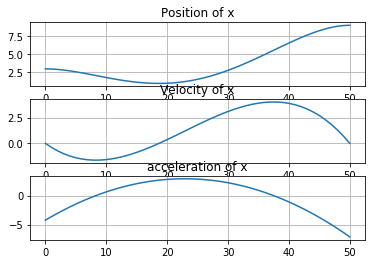

In [3]:
fig,(ax1,ax2,ax3) = plt.subplots(3, 1)#, sharex='all', sharey='all')

ax1.set_title("Position of x")
ax1.plot(pos_x)
ax1.grid()
ax2.set_title("Velocity of x")
ax2.plot(vel_x)
ax2.grid()
ax3.set_title("acceleration of x")
ax3.plot(acc_x)
ax3.grid()

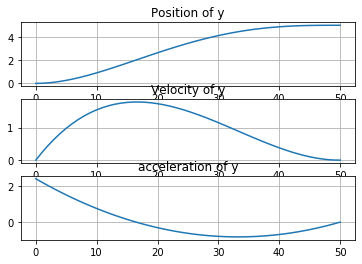

In [4]:
fig,(bx1,bx2,bx3) = plt.subplots(3, 1)
bx1.set_title("Position of y")
bx1.plot(pos_y)
bx1.grid()
bx2.set_title("Velocity of y")
bx2.plot(vel_y)
bx2.grid()
bx3.set_title("acceleration of y")
bx3.plot(acc_y)
bx3.grid()

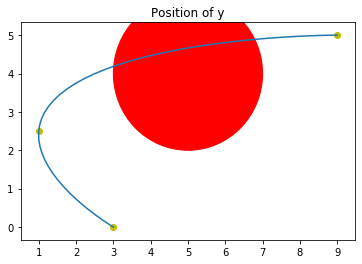

In [5]:
fig,ax = plt.subplots()
ax.plot(pos_x,pos_y)
points_x = [3,1,9]
points_y = [0,2.5,5]
ax.scatter(points_x,points_y,c='y')
ax.set_title("Position of y")
ax.add_artist(plt.Circle((5, 4), 2, color='r'))

In [6]:
ax = fig.add_subplot(111, aspect='equal')
for i in range(50):
    ax.scatter(pos_x[i],pos_y[i],c='b')
    plt.pause(0.0000005)

In [25]:
################# This is the secound poart of the asssinment ##################
n = 5
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return int(numer / denom)

def m_q(i,t):
    return (ncr(5,i)*((t/5)**i)*((1-t/5)**(n-i)))

def vel_q(i,t):
    if(i==0):
        return (-(1-(t/5)**4))
    
    elif(i==5):
        return ((t/5)**4)
    
    elif(i!=0 or i!=5):
        a = 0.2*ncr(5,i)*i*((t/5)**(i-1))*((1-(t/5))**(n-i))
        b = 0.2*ncr(5,i)*(n-i)*((t/5)**(i))*((1-(t/5))**(n-i-1))
        return  a - b
    
def accel_q(i,t):
    #0,1,4,5
    if(i==0):
        ans = (0.2*0.2)*(n)*(n-1)*(1-(t/5))**(n-2)
    elif(i==1):
        ans = (-(8*n)/25)*((1-t/5)**3) + ((12*n)/25)*((1-t/5)**2)*(t/5)
    elif(i==2):
        ans = (4/5)*((1-(t/5))**3) - ((24/5)*((1-t/5)**2)*(t/5)) - ((12/5)*((t/5)**2)*(1 - t/5))
    elif(i==3):
        ans = (12/5)*(t/5)*((1-t/5)**2) - (12/5)*((t/5)**2)*(1-t/5) - (12/5)*((t/5)**2)*(1-t/5) - (4/5)*((t/5)**3)
    elif(i==4):
        ans = (12/5)*(1-t/5)*((t/5)**2) - (8/5)*((t/5)**3)
    elif(i==5):
        ans = (4/5)*((t/5)**3)
        
    return (ans)

In [8]:
def M_mat():
    M = np.array([[m_q(i,0) for i in range(6)],
                  [vel_q(i,0) for i in range(6)],
                  [m_q(i,ti) for i in range(6)],
                  [vel_q(i,ti) for i in range(6)],
                  [m_q(i,5) for i in range(6)],
                  [vel_q(i,5) for i in range(6)]])
    return M

In [9]:
M = M_mat()
bx = np.array([3,0,1,0,9,0]).T
by = np.array([0,0,2.5,0,5,0]).T
px = np.linalg.pinv(M).dot(bx)
py = np.linalg.pinv(M).dot(by)

In [26]:
def pos_q(coff,t):
    a = 0
    for i in range(6):
        a += (ncr(5,i)*((t/5)**i)*((1-t/5)**(n-i)))*coff[i]
    
    return a


def velocity_q(coff,t):
    vel = 0
    for i in range(6):
        vel += coff[i]*vel_q(i,t)
        
    return vel

def acceleration_q(coff,t):
    a = 0
    for i in range(6):
        a += coff[i]*accel_q(i,t)
        
    return a
        

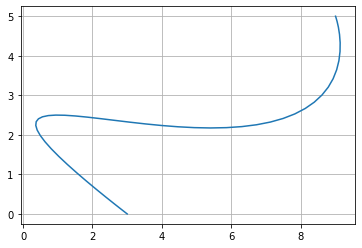

In [29]:
x_traj = []
y_traj = []
x_vel = []
y_vel = []
x_acc = []
y_acc = []
for t in range(0,51):
    x_traj.append(pos_q(px,t/10))
    y_traj.append(pos_q(py,t/10))
    x_vel.append(velocity_q(px,t/10))
    y_vel.append(velocity_q(py,t/10))
    x_acc.append(acceleration_q(px,t/10))
    y_acc.append(acceleration_q(py,t/10))
    
plt.plot(x_traj,y_traj)
plt.grid()

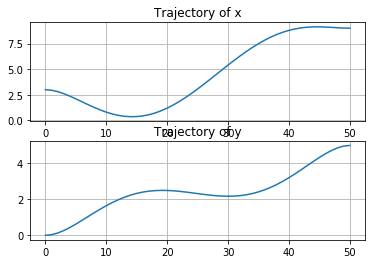

In [14]:
fig,(ax1,ax2) = plt.subplots(2, 1)#, sharex='all', sharey='all')

ax1.set_title("Trajectory of x")
ax1.plot(x_traj)
ax1.grid()
ax2.set_title("Trajectory of y")
ax2.plot(y_traj)
ax2.grid()

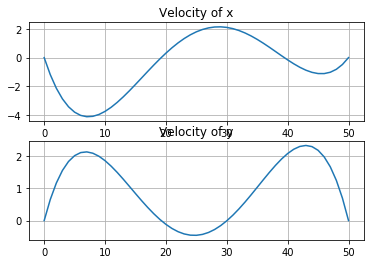

In [33]:

fig,(ax1,ax2) = plt.subplots(2, 1)#, sharex='all', sharey='all')

ax1.set_title("Velocity of x")
ax1.plot(x_vel)
ax1.grid()
ax2.set_title("Velocity of y")
ax2.plot(y_vel)
ax2.grid()

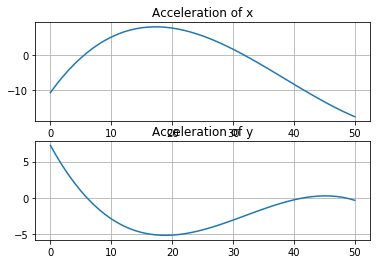

In [31]:
fig,(ax1,ax2) = plt.subplots(2, 1)#, sharex='all', sharey='all')

ax1.set_title("Acceleration of x")
ax1.plot(x_acc)
ax1.grid()
ax2.set_title("Acceleration of y")
ax2.plot(y_acc)
ax2.grid()